In [ ]:
import pandas as pv
df = pv.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df=df.dropna()
df.reset_index(inplace=True)

In [ ]:
import text_hammer as th
import regex as re
def get_clean(x):
    x = str(x).lower()
    x = re.sub(r"\|\|\|", " ", x)
    x = th.cont_exp(x)
    x = th.remove_emails(x)
    x = th.remove_urls(x)
    x = th.remove_html_tags(x)
    x = th.remove_stopwords(x)
    x = th.remove_rt(x)
    x = th.remove_accented_chars(x)
    x = th.remove_special_chars(x)
    # x = th.spelling_correction(x)
    x = th.make_base(x)

    return x


df['posts'] = df['posts'].progress_apply(
    lambda x: x.replace(x, get_clean(x)))

df.to_csv('Others\mbti_1.csv', index=False)

  0%|          | 0/8675 [00:00<?, ?it/s]

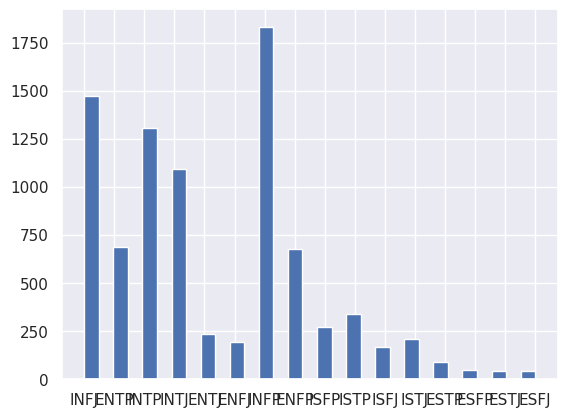

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()
# df['type'] = pv.Categorical(df['type'])
# sns.countplot(df.iloc[:,1].values)
# sns.countplot(df['type'])
# plt.show()
# df.iloc[:,1].hist(bins=32)
plt.hist(df.iloc[:, 1].values, bins=31)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'like'),
  Text(1, 0, 'think'),
  Text(2, 0, 'people'),
  Text(3, 0, 'I'),
  Text(4, 0, 'know'),
  Text(5, 0, 'you'),
  Text(6, 0, 'thing'),
  Text(7, 0, 'feel'),
  Text(8, 0, 'time'),
  Text(9, 0, 'good'),
  Text(10, 0, 'it'),
  Text(11, 0, 'want'),
  Text(12, 0, 'type'),
  Text(13, 0, 'love'),
  Text(14, 0, 'way'),
  Text(15, 0, 'not'),
  Text(16, 0, 'well'),
  Text(17, 0, 'friend'),
  Text(18, 0, 'go'),
  Text(19, 0, 'find'),
  Text(20, 0, 'say'),
  Text(21, 0, 'try'),
  Text(22, 0, 'get'),
  Text(23, 0, 'lot'),
  Text(24, 0, 'work'),
  Text(25, 0, 'look'),
  Text(26, 0, 're'),
  Text(27, 0, 'life'),
  Text(28, 0, 'come'),
  Text(29, 0, 'that')])

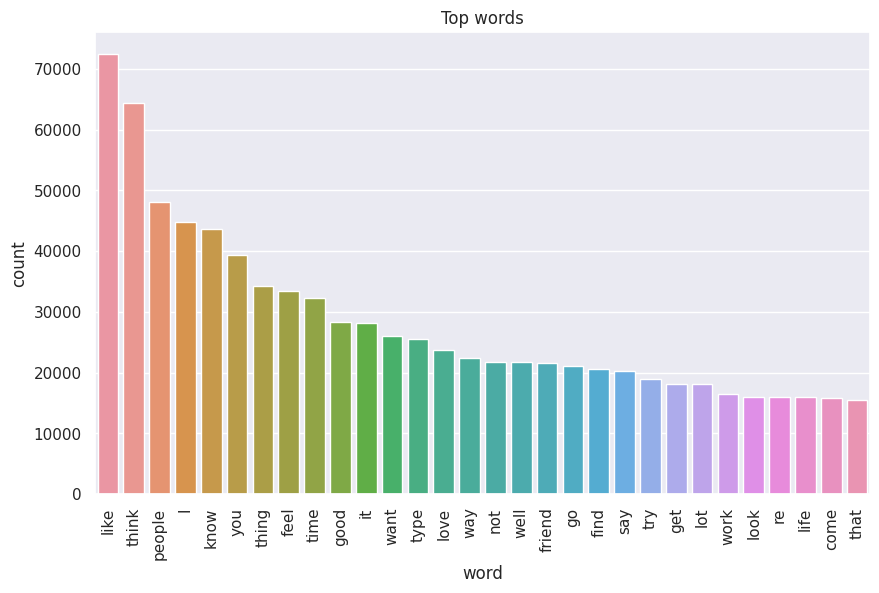

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pandas as pd

nltk.download('punkt')

words_list= []

for post in df['posts']:
    words_list.extend(nltk.word_tokenize(post))

freq_dist = nltk. FreqDist (words_list)
freq_dist.most_common(20)
temp=pd.DataFrame(freq_dist.most_common (30), columns=['word', 'count'])

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',data=temp, ax=ax)

plt.title("Top words")

plt.xticks(rotation = 'vertical')

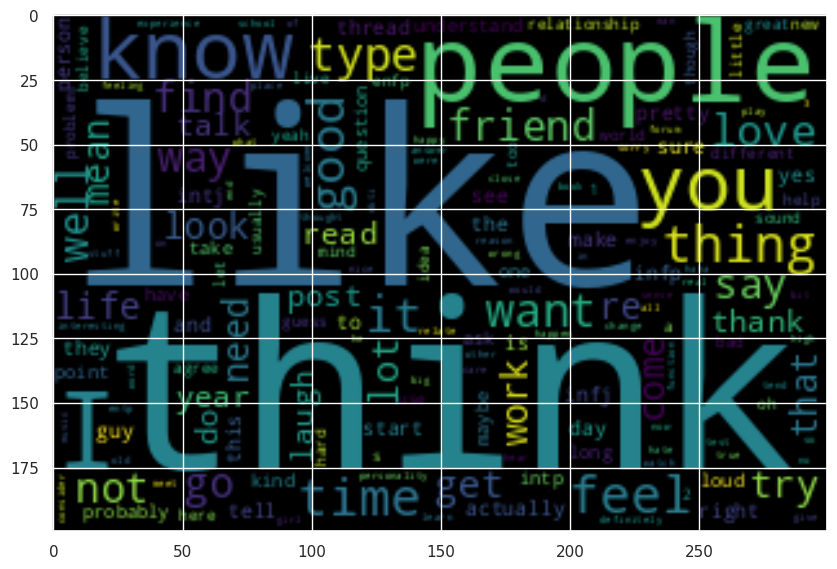

In [ ]:
import wordcloud
from wordcloud import WordCloud

# creation of wordcloud

wcloud_fig = WordCloud (stopwords=set (wordcloud.STOPWORDS),colormap='viridis', width=300, height=200).generate_from_frequencies (freq_dist)

# plotting the wordcloud

plt.figure(figsize=(10,7), frameon=True)
plt.imshow(wcloud_fig, interpolation = 'bilinear')
plt.show()

In [ ]:
df['words_per_comment']=df['posts'].apply(lambda x:len(x.split())/50)
df.head()

,index,type,posts,words_per_comment
0,0,INFJ,enfp intj moment sportscenter play prank lifec...,5.94
1,1,ENTP,I find lack post alarm sex boring position oft...,11.06
2,2,INTP,good _ _ _ _ _ course know blessing curse abso...,8.58
3,3,INTJ,dear intp enjoy conversation day esoteric gabb...,10.34
4,4,ENTJ,you re fire silly misconception approach logic...,9.26


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; yo

<Axes: xlabel='type', ylabel='words_per_comment'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.8% of the points cannot be placed; yo

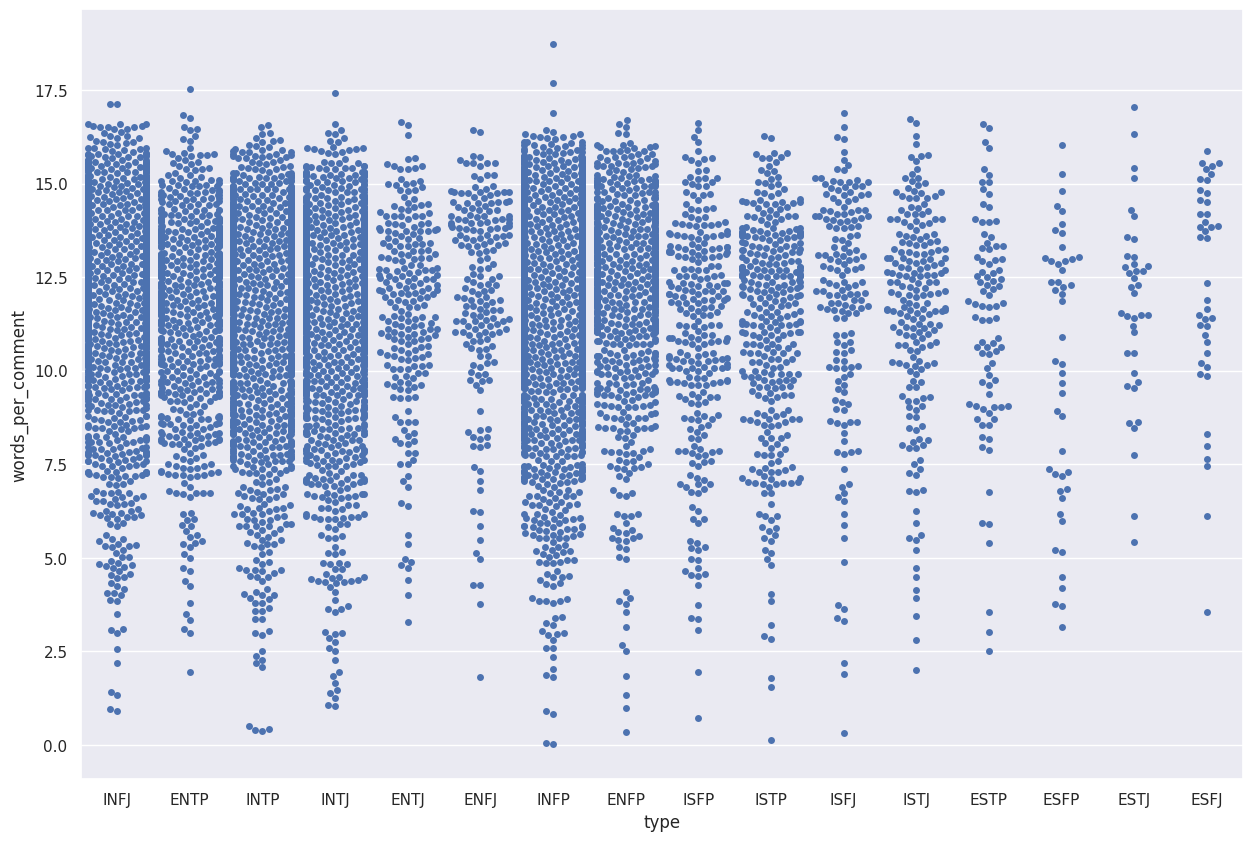

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type",y= "words_per_comment", data=df)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
y = df.iloc[:,1].values
print("before: \n",y)
le=LabelEncoder()
y=le.fit_transform(y)

y=to_categorical(y)
print("After: \n",y)

before: 
 ['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']
After: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
voc_size = 50000
messages=df['posts'].copy()
messages

0       enfp intj moment sportscenter play prank lifec...
1       I find lack post alarm sex boring position oft...
2       good _ _ _ _ _ course know blessing curse abso...
3       dear intp enjoy conversation day esoteric gabb...
4       you re fire silly misconception approach logic...
                              ...                        
8670    ixfp think cat fi dom reason especially websit...
8671    soif thread exist someplace which do heck dele...
8672    so question thing purple pill pick win lottery...
8673    I conflict right come want child honestly mate...
8674    it long personalitycafe change bit good like t...
Name: posts, Length: 8675, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]','',messages[i])
    review=review.lower()
    review=review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    corpus.append(review)

oe=[one_hot(words,voc_size) for words in corpus ]
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)
embedded_docs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array([[    0,     0,     0, ...,     0,     0, 27799],
       [    0,     0,     0, ...,     0,     0, 33768],
       [    0,     0,     0, ...,     0,     0, 30940],
       ...,
       [    0,     0,     0, ...,     0,     0, 47135],
       [    0,     0,     0, ...,     0,     0, 27522],
       [    0,     0,     0, ...,     0,     0, 24640]], dtype=int32)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import numpy as np

X=np.array(embedded_docs)
ros = RandomOverSampler(random_state=42) # fit predictor and target variable
x_rus, y_rus = ros.fit_resample(X, y)
x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ),ModelCheckpoint('./model0.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
dimension=100
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length = sent_length))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 dropout (Dropout)           (None, 250, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64, callbacks = callbacks )

Epoch 1/5
367/367 [==============================] - ETA: 0s - loss: 2.1841 - accuracy: 0.3511
Epoch 1: val_accuracy improved from -inf to 0.75797, saving model to ./model0.h5
367/367 [==============================] - 219s 585ms/step - loss: 2.1841 - accuracy: 0.3511 - val_loss: 0.9889 - val_accuracy: 0.7580
Epoch 2/5
367/367 [==============================] - ETA: 0s - loss: 0.6064 - accuracy: 0.8473
Epoch 2: val_accuracy improved from 0.75797 to 0.84752, saving model to ./model0.h5
367/367 [==============================] - 214s 583ms/step - loss: 0.6064 - accuracy: 0.8473 - val_loss: 0.5023 - val_accuracy: 0.8475
Epoch 3/5
367/367 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9537
Epoch 3: val_accuracy improved from 0.84752 to 0.85519, saving model to ./model0.h5
367/367 [==============================] - 214s 583ms/step - loss: 0.2360 - accuracy: 0.9537 - val_loss: 0.4967 - val_accuracy: 0.8552
Epoch 4/5
367/367 [==============================] - ETA: 0s 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ),ModelCheckpoint('model2.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [ ]:
max_features =50000
embedding_dim =64
sequence_length = 250

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, ))

model2.add(tf.keras.layers.Conv1D(128,16, activation='relu'))

model2.add(tf.keras.layers.GlobalMaxPooling1D())

model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(16, activation='sigmoid'))

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 64)           3200064   
                                                                 
 conv1d (Conv1D)             (None, 235, 128)          131200    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
Total params: 3,333,328
Trainable params: 3,333,328
Non-trainable params: 0
____________________________________________

In [ ]:
history_2 = model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64, callbacks = callbacks )

Epoch 1/5
367/367 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9549
Epoch 1: val_accuracy improved from -inf to 0.85946, saving model to model2.h5
367/367 [==============================] - 150s 408ms/step - loss: 0.2018 - accuracy: 0.9549 - val_loss: 0.5217 - val_accuracy: 0.8595
Epoch 2/5
367/367 [==============================] - ETA: 0s - loss: 0.1761 - accuracy: 0.9574
Epoch 2: val_accuracy did not improve from 0.85946
367/367 [==============================] - 141s 385ms/step - loss: 0.1761 - accuracy: 0.9574 - val_loss: 0.5242 - val_accuracy: 0.8591
Epoch 3/5
367/367 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9587
Epoch 3: val_accuracy improved from 0.85946 to 0.86116, saving model to model2.h5
367/367 [==============================] - 139s 379ms/step - loss: 0.1622 - accuracy: 0.9587 - val_loss: 0.5496 - val_accuracy: 0.8612
Epoch 4/5
367/367 [==============================] - ETA: 0s - loss: 0.1540 - accuracy: 0.9571
Epo

In [ ]:
max_features =50000
embedding_dim =64
sequence_length = 250

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, ))

model3.add(tf.keras.layers.Conv1D(128,16, activation='relu'))

model3.add(tf.keras.layers.MaxPooling1D())

model3.add(tf.keras.layers.Conv1D(128,16, activation='relu'))

model3.add(tf.keras.layers.GlobalMaxPooling1D())

model3.add(tf.keras.layers.Dropout(0.5))

model3.add(tf.keras.layers.Dense(16, activation='sigmoid'))

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 250, 64)           3200064   
                                                                 
 conv1d_7 (Conv1D)           (None, 235, 128)          131200    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 117, 128)         0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 102, 128)          262272    
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [ ]:
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ),
            ModelCheckpoint('./model3.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [ ]:
history_3 = model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64, callbacks = callbacks )

Epoch 1/5


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


367/367 [==============================] - ETA: 0s - loss: 2.7730 - accuracy: 0.0605
Epoch 1: val_accuracy improved from -inf to 0.05867, saving model to ./model3.h5
367/367 [==============================] - 253s 684ms/step - loss: 2.7730 - accuracy: 0.0605 - val_loss: 2.7728 - val_accuracy: 0.0587
Epoch 2/5
367/367 [==============================] - ETA: 0s - loss: 2.7728 - accuracy: 0.0612
Epoch 2: val_accuracy improved from 0.05867 to 0.05987, saving model to ./model3.h5
367/367 [==============================] - 249s 678ms/step - loss: 2.7728 - accuracy: 0.0612 - val_loss: 2.7730 - val_accuracy: 0.0599
Epoch 3/5
367/367 [==============================] - ETA: 0s - loss: 2.7727 - accuracy: 0.0606
Epoch 3: val_accuracy did not improve from 0.05987
367/367 [==============================] - 248s 675ms/step - loss: 2.7727 - accuracy: 0.0606 - val_loss: 2.7731 - val_accuracy: 0.0587
Epoch 4/5
367/367 [==============================] - ETA: 0s - loss: 2.7727 - accuracy: 0.0609
Epoch 4: 

In [ ]:
model = tf.keras.models.load_model('model0.h5')
preds = model.predict(x_test)
eval = model.evaluate(x_test,y_test)
print("Val. Loss: ",eval[0])
print("Val. Accuracy: ",eval[1])

184/184 [==============================] - 6s 34ms/step - loss: 0.5018 - accuracy: 0.8596
Val. Loss:  0.5018453001976013
Val. Accuracy:  0.8596282005310059


In [ ]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[365   0   0   5   0   0   0   0   3   2   3   2   0   0   0   0]
 [  0 309   0   2   0   0   0   0   6   7   6   8   0   2   0   0]
 [  1   1 396   0   0   0   0   0   5   2   1   2   0   2   0   1]
 [  2   4   0 284   0   0   0   0   4   4   7   4   0   5   2   0]
 [  0   0   0   0 382   0   0   0   0   0   2   1   0   0   0   0]
 [  0   0   2   1   0 371   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0 351   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0 391   0   0   0   1   0   0   0   0]
 [  0   3   0   2   0   0   0   0 104   7   9   2   0   0   0   2]
 [  0  36   0  36   0   0   0   0 213 297 128 157   0   2   0   5]
 [  3   1   0   6   0   0   0   0   8   7 212   5   0   0   0   3]
 [  0   0   0   3   0   0   0   0   8  10   2 150   0   0   0   0]
 [  0   0   1   1   0   0   0   0   2   2   1   1 350   0   0   0]
 [  2   1   0   0   0   0   0   0   2   3   4   5   0 371   0   0]
 [  1   0   2   3   0   0   0   0   3   4   2   0   0   0 351 

In [ ]:
model = tf.keras.models.load_model('model2.h5')
preds = model.predict(x_test)
eval = model.evaluate(x_test,y_test)
print("Val. Loss: ",eval[0])
print("Val. Accuracy: ",eval[1])

  1/184 [..............................] - ETA: 35s - loss: 0.5051 - accuracy: 0.9062

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


184/184 [==============================] - 7s 35ms/step - loss: 0.5496 - accuracy: 0.8612
Val. Loss:  0.5495995879173279
Val. Accuracy:  0.8611631989479065


In [ ]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[370   0   0   5   0   0   0   0   3   2   3   2   0   0   0   2]
 [  0 308   0   3   0   0   0   0   7   5   6   8   0   2   0   0]
 [  1   1 394   0   0   0   0   0   5   2   1   2   0   2   0   1]
 [  0   5   0 288   0   0   0   0   4   4   7   5   0   0   0   0]
 [  0   0   0   0 382   0   0   0   0   0   2   1   0   0   0   0]
 [  0   0   2   1   0 371   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0 351   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0 391   0   0   0   1   0   0   0   0]
 [  0   3   0   4   0   0   0   0 108   7  11   3   0   0   0   2]
 [  0  38   0  34   0   0   0   0 213 302 131 159   0   4   0   6]
 [  0   1   0   2   0   0   0   0   5   8 205   5   0   0   0   0]
 [  0   0   0   1   0   0   0   0   6   5   3 146   0   0   0   0]
 [  0   0   1   1   0   0   0   0   2   2   1   1 350   0   0   0]
 [  2   1   0   1   0   0   0   0   2   3   4   5   0 374   0   0]
 [  1   0   4   3   0   0   0   0   3   4   2   0   0   0 353 

In [ ]:
model = tf.keras.models.load_model('model3.h5')
preds = model.predict(x_test)
eval = model.evaluate(x_test,y_test)
print("Val. Loss: ",eval[0])
print("Val. Accuracy: ",eval[1])

184/184 [==============================] - 13s 70ms/step - loss: 2.7730 - accuracy: 0.0599
Val. Loss:  2.7730016708374023
Val. Accuracy:  0.05986696109175682


In [ ]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [376 360 401 344 382 371 351 391 360 345 379 344 350 387 353 369]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 